> ### EEE3314: Introduction to Artificial Intelligence

# Assignment VII: Principal Components Analysis

### *Assignement Instructions:*
- **Due date**: 11 PM, Dec. 3 (Fri), 2021
- **File name**: [ID_Name_HW7.ipynb]
- Write a program implementing a particular algorithm to solve a given problem.   
- **Report and discuss your results. Analyze the algorithm, theoretically and empirically.**

### *Collaboration policy:*
- You may discuss the questions with your friends, but each student writes their own codes and answers.  
- **Cheating is strictly prohibited, and will be considered academic dishonesty. This is not how you want to start your career as an engineer.** We expect that most students can distinguish between helping other students and cheating. Explaining the meaning of a question or discussing a way of approaching a solution is an interaction. But you should write your homework solution strictly by yourself so that your hands and eyes can help you internalize the subject matter. You should acknowledge everyone whom you have worked with, or who has given you any significant ideas about the homework
- Signiture: <span style="color:blue">[Insert your ID HERE] [Insert your name HERE]</span>

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2021-11-18 13:02:30.182087


In [2]:
%load_ext autoreload
%autoreload 2

## Problem statement

In this project, we will use the $\texttt{Labeled Faces in the Wild (LFW)}$ dataset. For more details about the dataset, please refer to the descriptions in the assignment VI.

In [3]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [4]:
def plot_faces(images, tile, fig_size=(8, 5), disp_name=True):
    fig = plt.figure(figsize=fig_size)
    for i in range(tile[0] * tile[1]):
        ax = fig.add_subplot(tile[0], tile[1], i+1, xticks=[], yticks=[])
        ax.imshow(images[i], cmap='gray')
        if disp_name:
            ax.set_title(faces.target_names[faces.target[i]])
    plt.show()

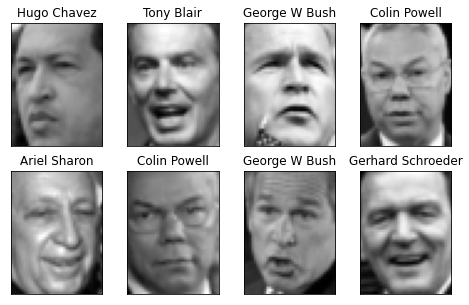

In [5]:
plot_faces(faces.images, tile=(2, 4))

In the assignemnt VI, we used the **eigenface** to extract the features for the face image. The eigenface representation provides a set of eigenvectors (i.e., orthonormal basis) for face images. This suggests that we can represent an arbitrary face image as a linear combination of the eigenvectors and corresponding coefficients. The eigenface representations could also be used to compress face images by projecting them onto the eigenface, discarding eigenvectors with small coefficients, and reconstructing the face images with limited eigenvectors. 

Let's apply a $\texttt{PCA}$ to decompose the face images in the $\texttt{LFW}$ dataset.

**NOTE**: To implement the $\texttt{PCA}$, exploiting ```sklearn.decompose``` (or equivalent) **will not be allowed**. You will get no credit otherwise.

### P1. Principal Component Analysis

P1.1 Implement the PCA (the ```PCA``` class). To compute the covariance matrix, and its corresponding eigenvalues and eigenvectors, you can use a ```numpy``` built-in function. Note that normally face images are standardized before applying a dimension reduction technique, and you should undo the standardization when reconstructing the original face images. *(40 points)*

P1.2 Run the code provided to plot the eigenfaces. Analyze the meaning of eigenfaces and corresponding eigenvalues. *(5 points)*

P1.3 Run the code provided to plot original face images, face images projected onto each component of eigenfaces, and reconstructed face images with eigenfaces. Analyze and contrast the differences between the original and reconstructed face images. Also describe the differences between results for the two examples. *(10 points)*

### P2. Face Recognition System

P2.1 Implement a face recognition system (the ```FaceRecognizer``` class). The face recognition system projects face images (i.e., training samples) onto eigenspace spanned by eigenfaces. It then saves the coefficients corresponding each eigenvector as a feature to represent the identity of a face image in the database. 

When we query a novel face image (i.e., test samples), the system projects the face images again onto the eigenspace, followed by extracting coefficients. We can identify the identity of the query face image, by retrieving the nearest neighbor (in terms of L2 norm) for the extracted coefficient in the database. *(20 points)*

P2.2 Run the code provided to plot the query faces and corresponding nearest faces in the database. *(5 points)*

---

## Results

In [6]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

from project7 import *


faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

### Prepare Dataset

In [7]:
image_shape = faces.images[0].shape
X = faces.data
y = faces.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [9]:
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)

X_train.shape:  (862, 1850)
y_train.shape:  (862,)


### P1.1

In [10]:
num_components = 150
pca = PCA(num_components=num_components)

In [11]:
pca.find_principal_components(X_train)

In [12]:
pca.eigenbasis[0].dot(pca.eigenbasis[5])
print("% 10f"% (pca.eigenbasis[0].dot(pca.eigenbasis[5])))

 -0.000000


In [13]:
print("% 10f"% pca.eigenbasis[5].dot(pca.eigenbasis[5]))

  1.000000


### Mean face image for training samples

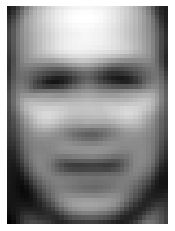

In [14]:
plt.imshow(pca.X_mean.reshape(image_shape), cmap='gray')
plt.axis('off')
plt.show()

### Standardized training samples

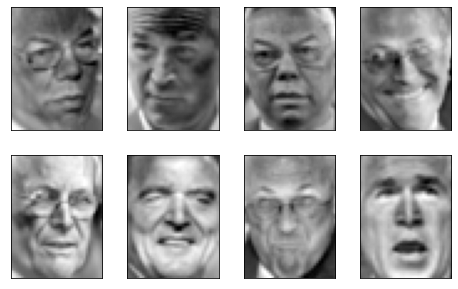

In [15]:
plot_faces(((X_train - pca.X_mean) / pca.X_std).reshape(X_train.shape[0], image_shape[0], image_shape[1]), tile=(2, 4), disp_name=False)

In [16]:
data_reduced = pca.reduce_dimensionality(X_train)
data_reduced.shape

(862, 150)

In [17]:
eigenbasis = pca.eigenbasis
eigenbasis.shape

(150, 1850)

---

### P1.2

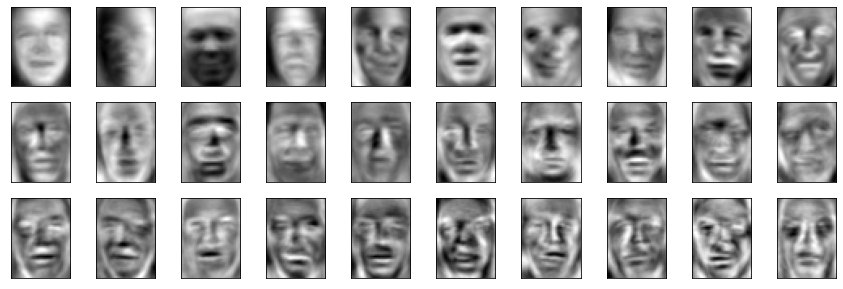

In [18]:
plot_faces(eigenbasis.reshape(num_components, image_shape[0], image_shape[1]), fig_size=(15, 5), tile=(3, 10), disp_name=False)

In [19]:
np.diag(eigenbasis.dot(eigenbasis.T))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
diag = np.zeros((num_components, num_components))
np.fill_diagonal(diag, 1)
print("% 10f"% np.max(eigenbasis.dot(eigenbasis.T) - diag))

  0.000000


Describe your analysis here

---

### P1.3

In [21]:
sample_decomposed = pca.reduce_dimensionality(X_test)[0]
sample_decomposed.shape

(150,)

In [22]:
representations_onto_eigenbasis, sample_reconstructed = pca.reconstruct_original_sample(sample_decomposed)

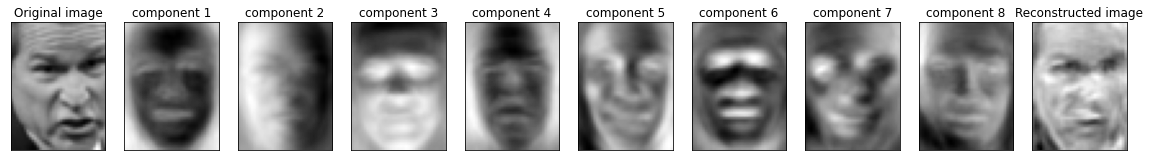

In [23]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 10, 1, xticks=[], yticks=[])
ax.imshow(X_test[0].reshape(image_shape), cmap='gray')
ax.set_title('Original image')
for i in range(8):
    ax = fig.add_subplot(1, 10, i+2, xticks=[], yticks=[])
    ax.imshow(representations_onto_eigenbasis[i, :].reshape(image_shape), cmap='gray')
    ax.set_title(f"component {i+1}")
ax = fig.add_subplot(1, 10, 10, xticks=[], yticks=[])
ax.imshow(sample_reconstructed.reshape(image_shape), cmap='gray')
ax.set_title('Reconstructed image')

plt.show()

In [24]:
sample_decomposed = pca.reduce_dimensionality(X_test)[100]
sample_decomposed.shape

(150,)

In [25]:
representations_onto_eigenbasis, sample_reconstructed = pca.reconstruct_original_sample(sample_decomposed)

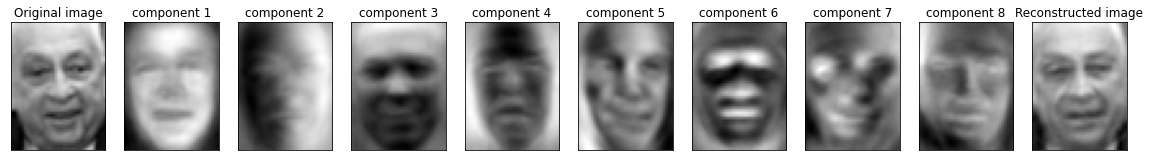

In [26]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 10, 1, xticks=[], yticks=[])
ax.imshow(X_test[100].reshape(image_shape), cmap='gray')
ax.set_title('Original image')
for i in range(8):
    ax = fig.add_subplot(1, 10, i+2, xticks=[], yticks=[])
    ax.imshow(representations_onto_eigenbasis[i, :].reshape(image_shape), cmap='gray')
    ax.set_title(f"component {i+1}")
ax = fig.add_subplot(1, 10, 10, xticks=[], yticks=[])
ax.imshow(sample_reconstructed.reshape(image_shape), cmap='gray')
ax.set_title('Reconstructed image')

plt.show()

Describe your analysis here.

---

### P2.1

In [27]:
face_recognizer = FaceRecognizer(num_components=150, X=X_train, y=y_train)
face_recognizer.generate_database()

In [28]:
print(X_test.shape)
print(face_recognizer.database.shape)

(426, 1850)
(862, 150)


In [29]:
pred, distances, db_indices = face_recognizer.find_nearest_neighbor(X_test)

In [30]:
print(f"accuracy: {np.average(pred == y_test):0.4f}")

accuracy: 0.6080


In [31]:
pred.shape

(426,)

In [32]:
distances.shape

(426, 1)

In [33]:
db_indices.shape

(426,)

### P2.2

In [34]:
def plot_recognition_result(recognizer, X, y, num_queries=5, names=faces.target_names, image_shape=image_shape):
    indices = np.random.randint(low=X['test'].shape[0], size=num_queries)
    print(f"Sampled indices :{indices}")
    
    pred, distances, db_indices = face_recognizer.find_nearest_neighbor(X_test[indices, :])
    
    for i in range(num_queries):
        fig = plt.figure(figsize=(6, 4))
        
        plt.subplot(1, 2, 1)
        plt.imshow(X['test'][indices[i], :].reshape(image_shape), cmap='gray')
        plt.xticks([], [])
        plt.yticks([], [])
        plt.xlabel(f"Name: {names[y['test'][indices[i]]]} \n Prediction: {names[pred[i]]}")
        plt.title('Query')

        plt.subplot(1, 2, 2)
        plt.imshow(X['train'][db_indices[i], :].reshape(image_shape), cmap='gray')
        plt.xticks([], [])
        plt.yticks([], [])
        plt.xlabel(f"Name: {names[y['train'][db_indices[i]]]} \n Distance: {distances[i].item():0.2f}")
        plt.title('Prediction')
        
        plt.show()


Sampled indices :[410 174  33  68 381]


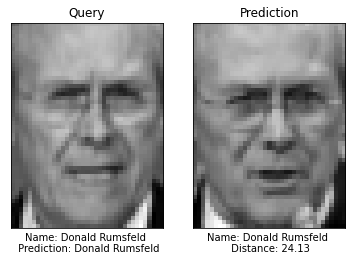

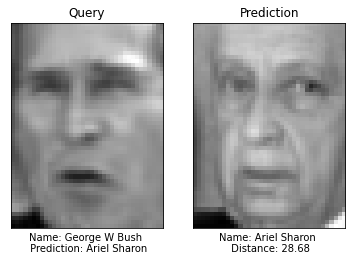

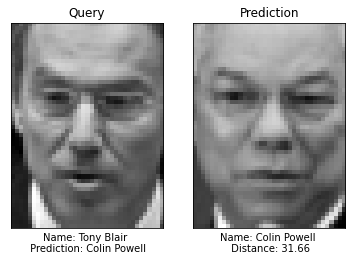

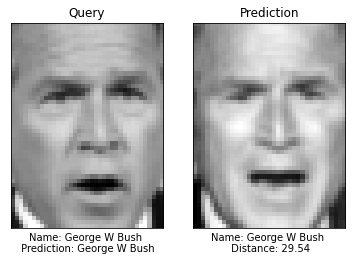

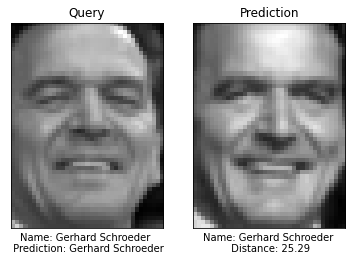

In [35]:
np.random.seed(555)
X = {'train': X_train, 'test': X_test}
y = {'train': y_train, 'test': y_test}
plot_recognition_result(face_recognizer, X, y)

Describe your analysis here

---

## Discussion (20 points)

Your answer must include

- The curse of dimensionality.
- Feature selection vs. feature extraction.
- Explanation of PCA.
- How the PCA can deal with noisy informations (e.g., face images with sunglasses and/or medical mask,...).
- Analysis on the limitations of PCA.
    
For analysis and discussion, you can exploit all functions you've written or make your own functions (or scripts).

Describe your discussion here

---